In [1]:
import numpy as np 
import time 
import os  
import xarray as xr
import subprocess
import matplotlib.pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs

In [2]:
## import self defined functions
from sys import path 
# insert at 1, 0 is the script path (or '' in REPL)
path.insert(1, '/tigress/cw55/local/python_lib')
from cg_funcs import global_mean_xarray 

In [3]:
plt.rcParams['font.size'] = '6'

In [4]:
file_path = '/scratch/gpfs/cw55/AM4/work/CTL2000_test2000s_nn_stellarcpu_intelmpi_22_768PE_base/'
dssst = xr.open_dataset(file_path+'/INPUT/hadisst_sst.data.nc').sst.sel(lat=slice(-60,60))  
dssst_clm = xr.open_dataset('./hadisst_sst_ctl.data.nc').sst.sel(lat=slice(-60,60))   
gm1 = global_mean_xarray(dssst.groupby('time.year').mean('time'))
gm2 = global_mean_xarray(dssst_clm.mean('time'))

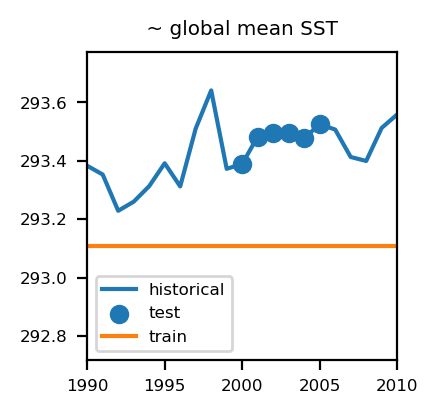

In [5]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=200)

plt.plot(gm1.year,gm1, label='historical')
plt.scatter(gm1.year[131:131+6],gm1[131:131+6], label='test')
plt.plot([gm1.year[0],gm1.year[-1]],[gm2,gm2], label='train') 
plt.xlim([1990,2010])
plt.title(' ~ global mean SST ')
plt.legend(fontsize=6) 

In [6]:
nino34 = dssst.sel(time=slice('2000','2008'))\
.sel(lon = slice(190,240)).sel(lat = slice(-5,5)).mean(['lat','lon']).rolling(time=3,center=True).mean()
nino34_clm = dssst_clm.sel(time=slice('2000','2008'))\
.sel(lon = slice(190,240)).sel(lat = slice(-5,5)).mean(['lat','lon']).rolling(time=3,center=True).mean()

Text(0.5, 1.0, ' Nino3.4 region SST 3-month mean')

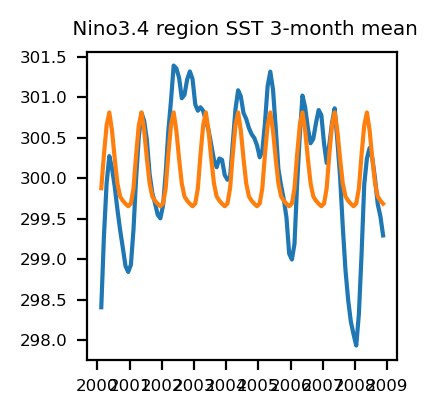

In [7]:
fig, axs = plt.subplots(nrows=1,ncols=1,figsize=(2,2),dpi=200)

plt.plot(nino34.time,nino34) 
plt.plot(nino34_clm.time,nino34_clm) 
plt.title(' Nino3.4 region SST 3-month mean')